<a href="https://colab.research.google.com/github/rjoshna/Equilateral-triangle-pattern/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/LoanApprovalPrediction.csv")


In [ ]:
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [ ]:
if 'Loan_ID' in data.columns:
    data.drop(['Loan_ID'],axis=1,inplace=True)

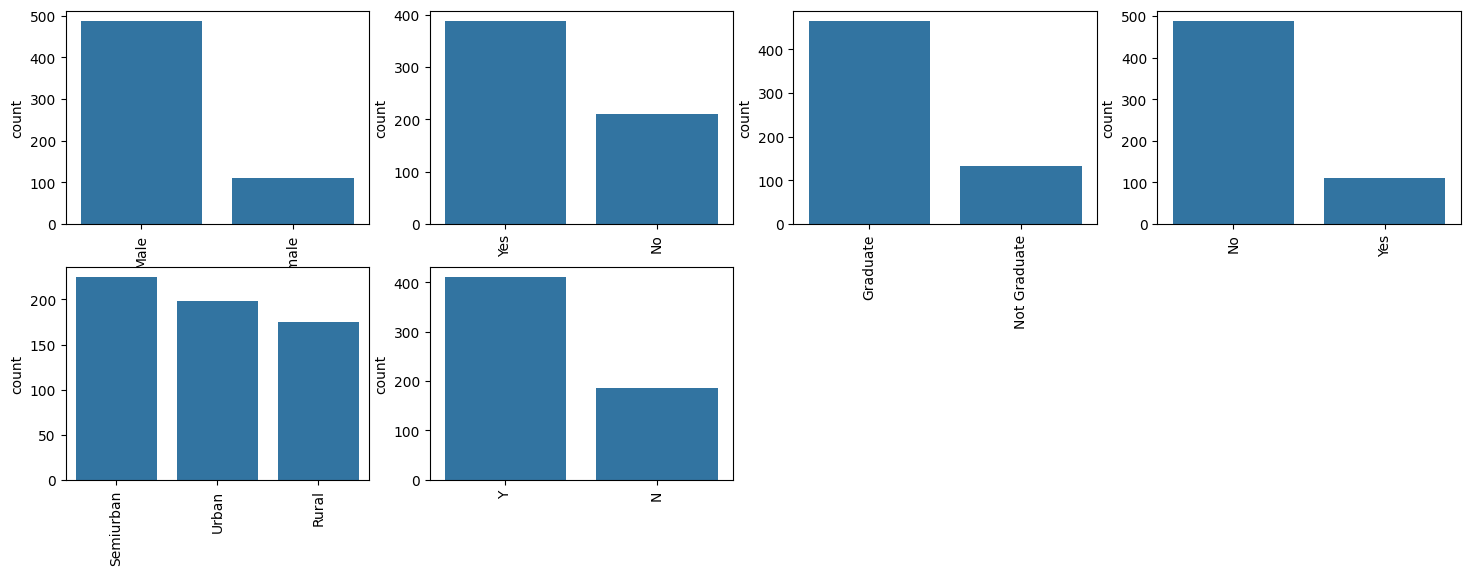

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

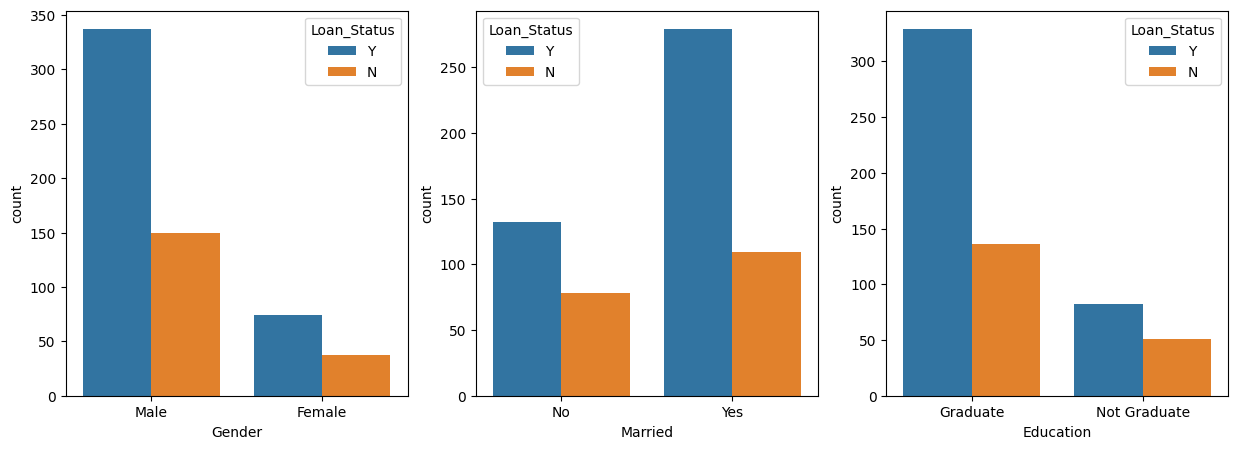

In [ ]:
# Create a new figure for the plots
plt.figure(figsize=(15, 5))

# Plot the relationship between 'Gender' and 'Loan_Status'
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=data)

# Plot the relationship between 'Married' and 'Loan_Status'
plt.subplot(1, 3, 2)
sns.countplot(x='Married', hue='Loan_Status', data=data)

# Plot the relationship between 'Education' and 'Loan_Status'
plt.subplot(1, 3, 3)
sns.countplot(x='Education', hue='Loan_Status', data=data)

# Display the plots
plt.show()

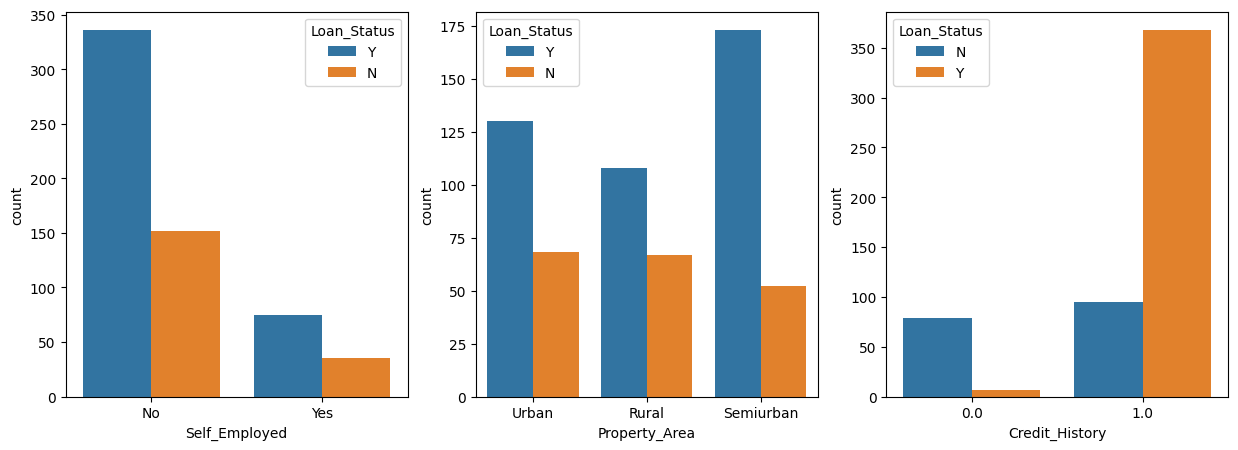

In [ ]:
# Create a new figure for the plots
plt.figure(figsize=(15, 5))

# Plot the relationship between 'Self_Employed' and 'Loan_Status'
plt.subplot(1, 3, 1)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)

# Plot the relationship between 'Property_Area' and 'Loan_Status'
plt.subplot(1, 3, 2)
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

# Plot the relationship between 'Credit_History' and 'Loan_Status'
plt.subplot(1, 3, 3)
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)

# Display the plots
plt.show()

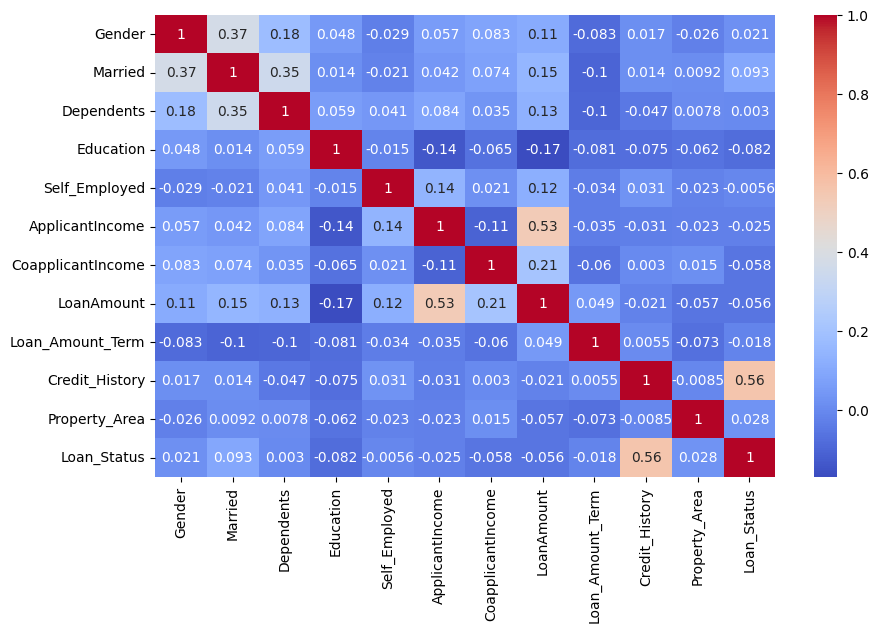

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create a new figure for the plots
plt.figure(figsize=(10, 6))

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the object columns
for col in object_cols:
    # Fit and transform the column
    data[col] = le.fit_transform(data[col])

# Display the heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [ ]:
# Fill missing values in numerical columns
data.fillna({'Dependents': data['Dependents'].mode()[0],
             'LoanAmount': data['LoanAmount'].mean(),
             'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0],
             'Credit_History': data['Credit_History'].mode()[0]}, inplace=True)

# Verify that there are no more missing values
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8166666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.8
